In [41]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import clear_output

import torch
import torch.nn as nn
from torch.autograd import Variable

from mnist import MNIST

from src.white_box import fgsm

f = open('target_network.p', 'rb')
model = pkl.load(f)
f.close()

path_to_MNIST = '/home/cole/Desktop/other/ML/DATASETS/MNIST'

mndata = MNIST(path_to_MNIST)
X_train, y_train = mndata.load_training()
X_train = np.array(X_train).reshape(-1, 28, 28)
y_train = np.array(y_train)


In [2]:
%load_ext autoreload
%autoreload 2

i=11


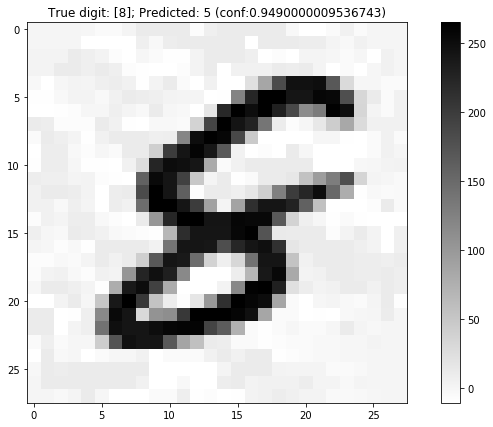

loss=3.34529
Normalized L2 diff: 0.00784


KeyboardInterrupt: 

In [43]:
def projector(x, og_x):
    return x

x_idx = np.random.randint(X_train.shape[0])
x = X_train[x_idx]
y = y_train[x_idx].reshape(1, )
loss = nn.CrossEntropyLoss()
eps = 1.

def plot_x(x, y, y_pred, conf):
    f, ax = plt.subplots(figsize=(12, 7))
    ax.set_title('True digit: {t}; Predicted: {p} (conf:{c})'.format(
        t=y, p=y_pred, c=round(conf, 3)
    ))
    cs = ax.imshow(x.reshape(28, 28), cmap=cm.binary)
    plt.colorbar(cs, ax=ax)
    plt.show()

xx = np.array(x)
i = 0
while True:
    clear_output()
    print('i=%d' % i)
    
    
    probs = model(Variable(
        torch.Tensor(xx).reshape(1, 1, 28, 28)
    )).detach().numpy()
    probs = np.exp(probs).reshape(10, )
    probs /= probs.sum()
    
    y_pred = probs.argmax()
    conf = probs[y_pred]
    
    plot_x(xx, y, y_pred, conf)
    
    xx = fgsm(xx, y, model, loss, projector, eps)
    
    norm_diff = np.mean((xx - x)**2) / np.mean(x**2)
    print('Normalized L2 diff: %.5f' % norm_diff)
    i += 1
    input()